# Customer Churn Analysis

#### Dataset Info : Sample Dataset containing customer data and showing customer left last month

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#### Load the file

In [ ]:
df = pd.read_csv('CustomerChurn.csv')

In [ ]:
df.head()

#### Check the various attribute of data like :
##### i) shape (rows,column)
##### ii)  Columns
##### iii) data types

In [15]:
df.shape

(7043, 21)

In [42]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [35]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Checking the descriptive Statistics of the Dataset

In [40]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


#### Insight from the descriptive Statistics data
##### Senior Citizen is actually a categorical hence the 25%-50%-75% distribution is not proper
##### 75% of the customers have tenure less than 55 months
##### Avg Monthly charges are USD 64.76 where as 25% customers pay more than USD 89.85 per month

### Number of churned and unchurned people

In [43]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Percentage of churned and unchurned people

In [47]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

### Graph showing the number of churned and unchurned people

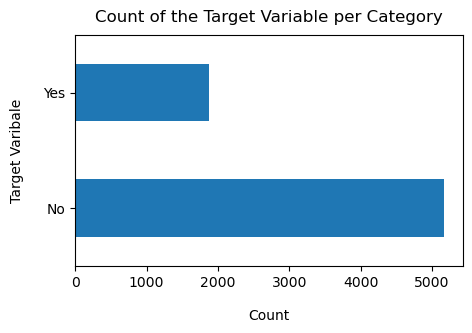

In [13]:
df['Churn'].value_counts().plot(kind = 'barh', figsize = (5,3))
plt.xlabel('Count',labelpad = 14)
plt.ylabel('Target Varibale',labelpad = 14)
plt.title('Count of the Target Variable per Category',y=1.02);

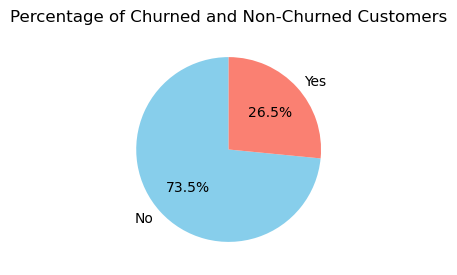

In [11]:
churn_counts = df['Churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(3,3))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title('Percentage of Churned and Non-Churned Customers', y=1.02)
plt.show()

#### Insights
##### Data is highlt imbalance, ratio is almost = 73:27
##### So we analyse the data with other feature while taking the target values separately to get some insights

### Concise Summary of the data

In [65]:
df.info() #verbose =True . It is used when there are 100's of coulumn it gives ease to scroll the column name below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### from here we can se that the TotalCharges Column is in String type we have to convert it into the Integer type data

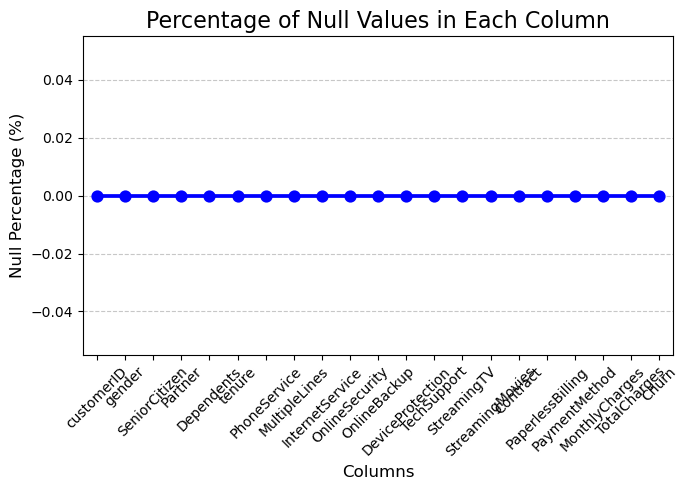

In [17]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = null_percentage.reset_index()
null_df.columns = ['Column', 'Null Percentage']
plt.figure(figsize=(7,5))
sns.pointplot(x='Column', y='Null Percentage', data=null_df, color='blue', markers="o")
plt.title('Percentage of Null Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Null Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Missing Data - Initial Institution
#### We don't have any missing data.
### General Thumb rule :
##### For features with less missing values - Can use the regression to predict the missing values or fill with the mean of the values present, depending on the feature.
##### For feature with very high missing values - Its better to drop those columns as they give very less insight or analysis.
##### As there's no thumb rule on what criteria we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there is a catch here, for example, Is_Car and Car_type, People having no cars, will obviously have car_type as NaN (null), But that dosen't make this column useless, so decision has to be takes wisely

### Data Cleaning

#### 1) Making the copy of data for manipulating the data so the main dataset doesn't get impacted

In [ ]:
new_df = df.copy()

In [ ]:
new_df.head()

#### 2) Total Charges should be in numeric type : Lets change the datatype . 

In [27]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
new_df.info()

##### Here we can see as there are 11 null values in the column. Let's check these records

#### 3) Missing Value Treatment
#### Hence, the % of the missing values compared to the dataset is very less as 0.15%. It is safe to ignore them for further processing

In [108]:
# Removing the missing values
new_df.dropna(how = 'any', inplace = True)

In [110]:
new_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 4) Divide customers into bins based on tenure e.g. for tenure <12 months : assign it to group 1-12, for tenure b/w 1-2 yrs assign it to group 13-24 and so on. 

In [114]:
print(new_df['tenure'].max())

72


In [116]:
labels = ['{0} - {1}'.format(i , i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [44]:
# Group the tenure in bins for 12 months
labels = ['{0} - {1}'.format(i,i+11) for i in range(1,72,12)]

new_df['tenure_group'] = pd.cut(new_df.tenure,range(1,80,12),right = False, labels = labels)

In [120]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

#### 5) Remove column not required for processing

In [123]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [125]:
new_df.drop(['customerID','tenure'],axis = 1, inplace = True)

In [131]:
new_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


### Data Exploration

#### Plot distribution of individual predictors for churn

### Univariate Analysis

In [137]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


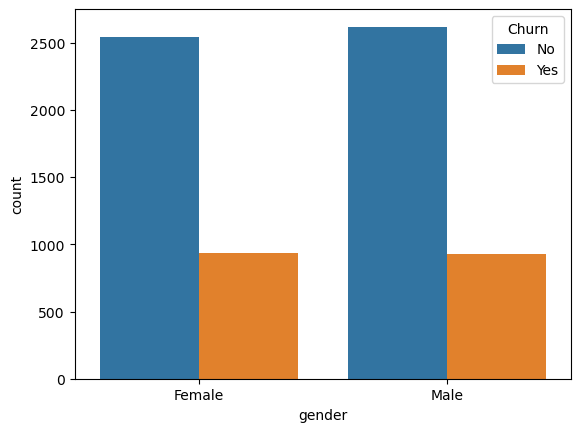

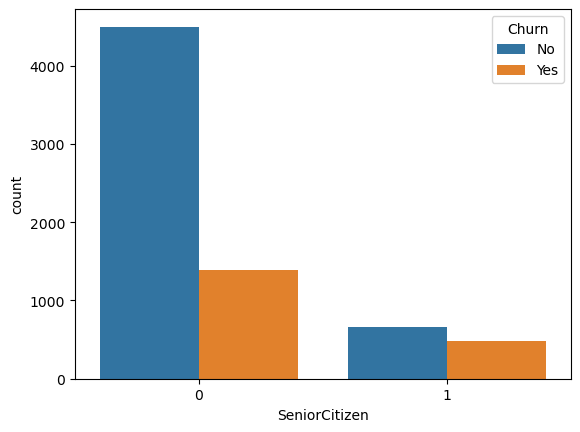

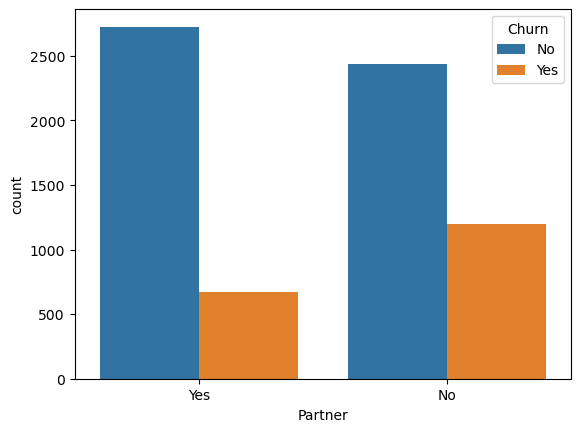

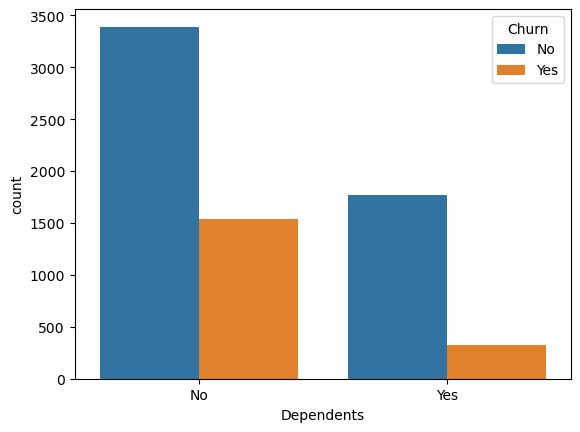

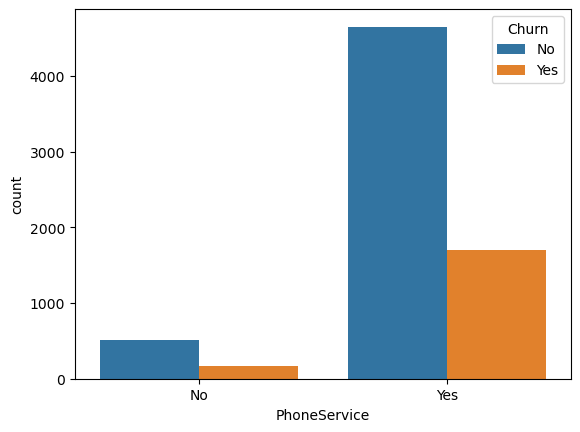

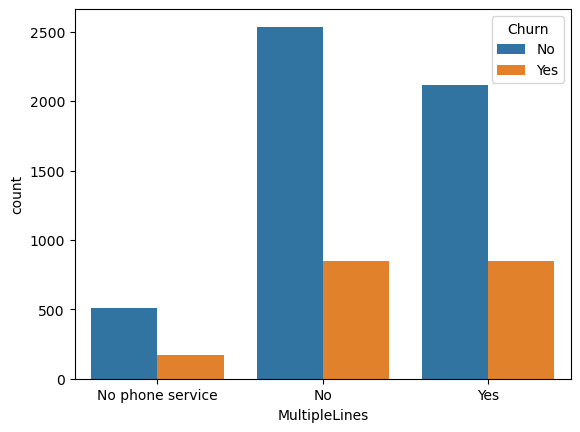

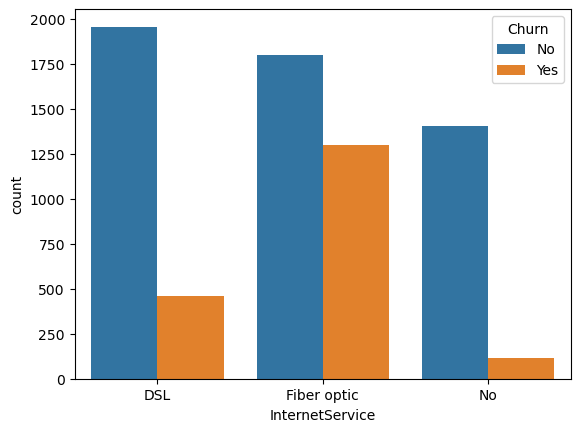

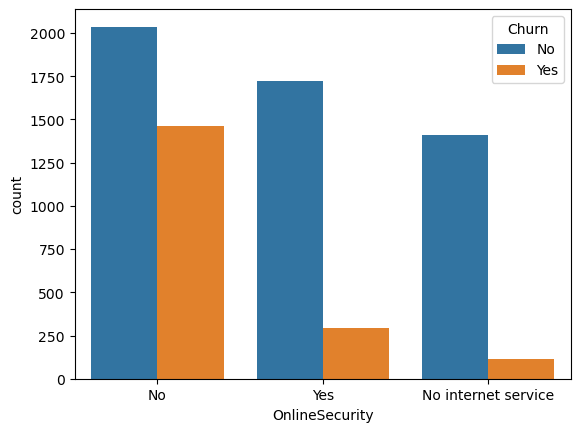

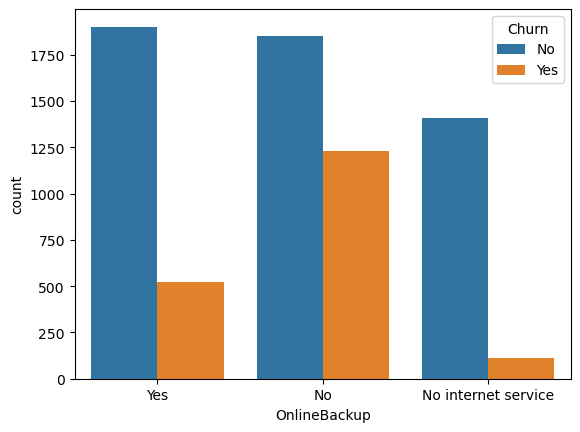

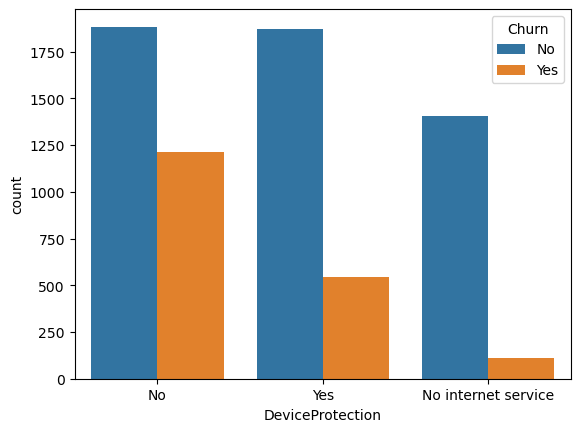

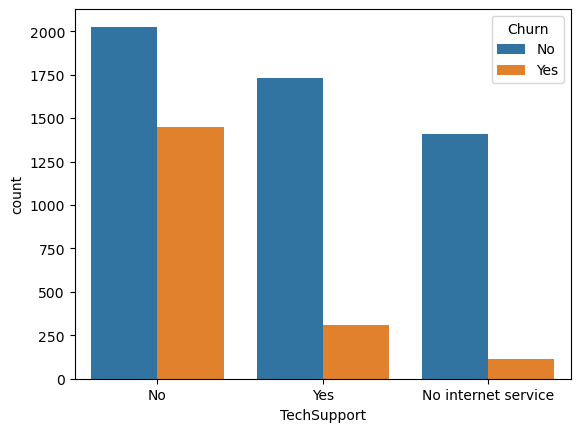

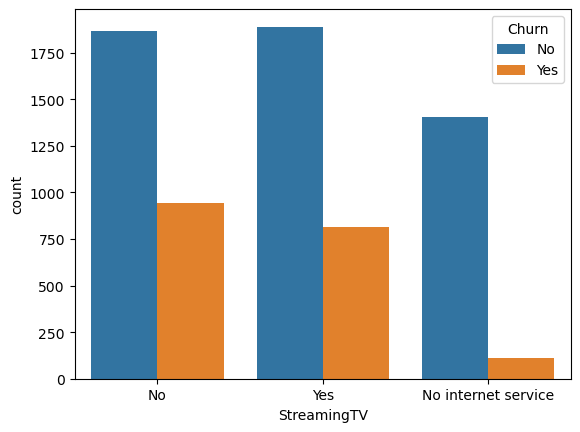

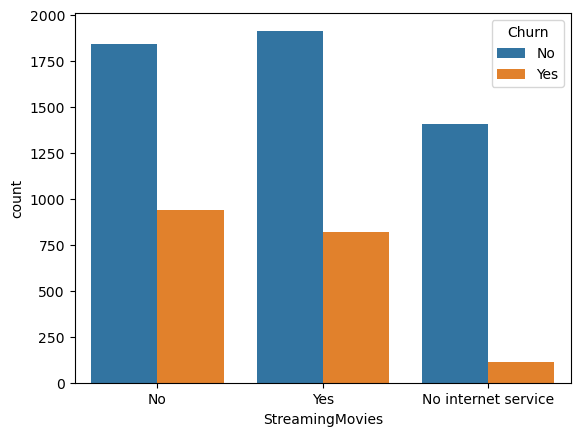

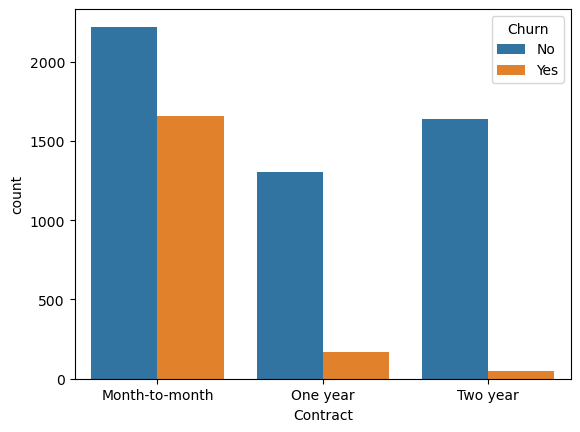

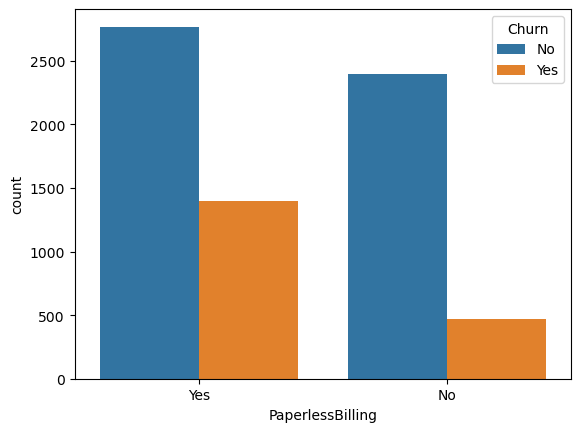

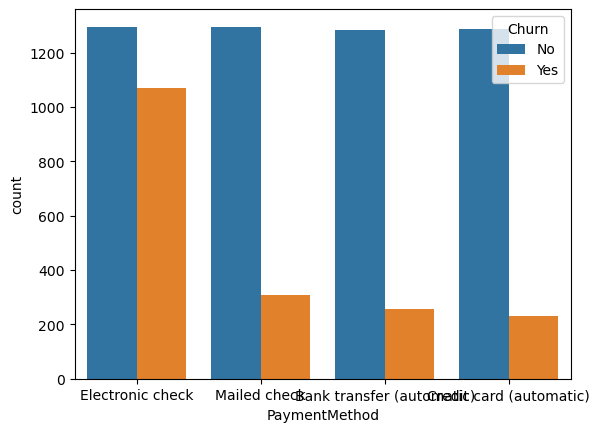

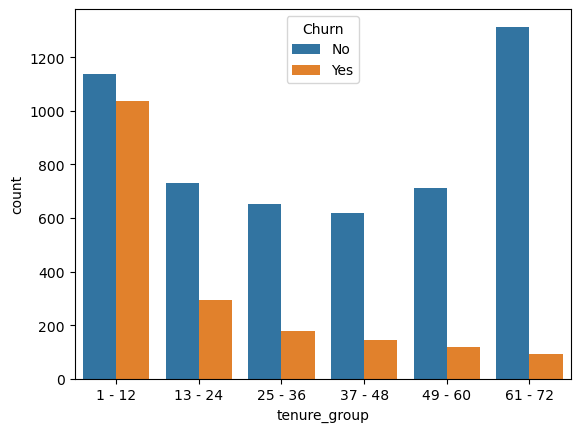

In [147]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')

# Insights

### Numerical Analysis

In [ ]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [ ]:
new_df1_target1.gender.value_counts()

In [164]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

##### 1) Ratio is almost same niot getting any insights

In [168]:
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


##### 2) Electronic payment methid has the high number of churners

### Converting the varibale 'Churn' in a binary vaiable i.e. Yes = 1 & No = 0
#### Because we are going to perform some correlation analysis and it is not possible to perform it in a Categorical Variable like Yes and NO

In [176]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [178]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### Converting all the categorical varibale into the dummy variable

In [ ]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

In [ ]:
new_df_dummies = new_df_dummies.astype(int)

In [ ]:
new_df_dummies.head()

#### Relationship between Monthly Charges and Total Charges

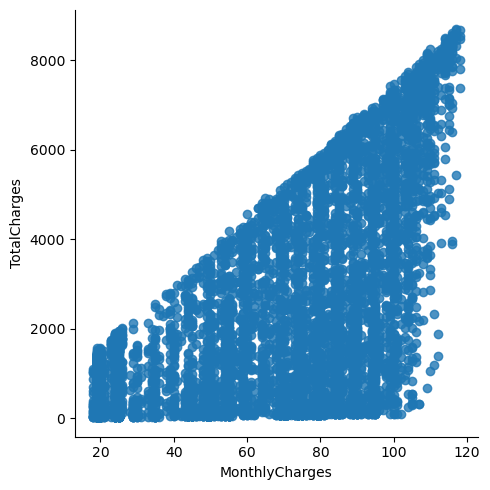

In [196]:
sns.lmplot(data = new_df_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [ ]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

##### In this case the correaltion is positively Correlated ( Correlation is defined between -1 to +1, if the value is near -1 it means it is negatively correlated and when it is closer to +1 then it is positively correlated).

#### Total Charges increses as the Monthly Charges increses - as expected

#### Churn by Monthly Charges and Total Charges

C:\Users\HP\AppData\Local\Temp\ipykernel_8936\4051015697.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)],


Text(0.5, 1.0, 'Monthly Charges by Churn')

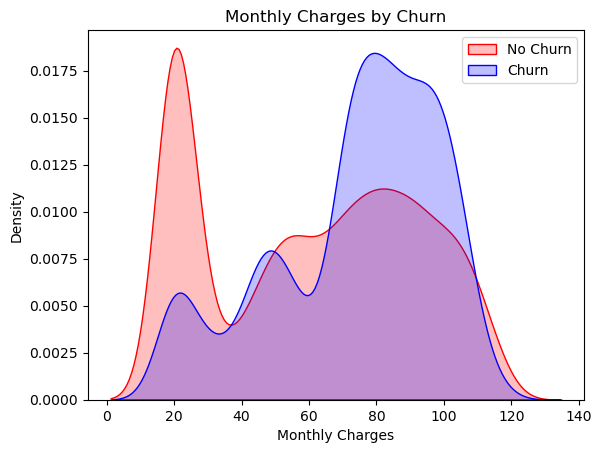

In [208]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)],
                  color='Red',fill=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)],
                  ax=Mth,color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

##### Churn is high when the monthly charges are high

C:\Users\HP\AppData\Local\Temp\ipykernel_8936\3654355732.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)],


Text(0.5, 1.0, 'Total Charges by Churn')

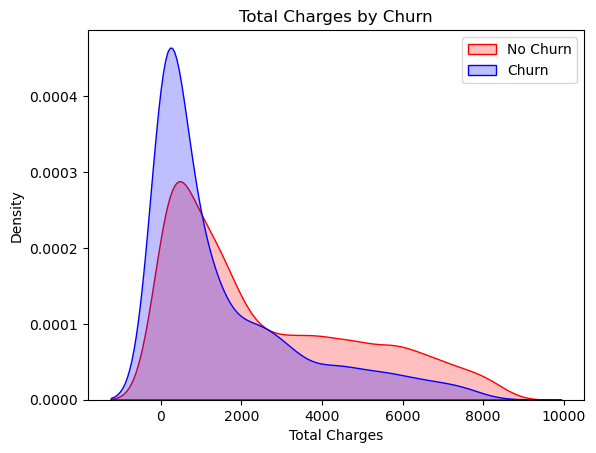

In [210]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)],
                  color='Red',fill=True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)],
                  ax=Tot,color='Blue',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

#### Surprising Insight : As higher Churn at lower Charges
##### However if we combine the insights of 3 parameter i.e. Tenure,Monthly Charges & Total Charges then the picture is bit clear :- Higher the Monthly Charges at lower tenure results lower Total Charges. Hence all these 3 factors viz Higher Monthly Charge,Lower Tenure and Lower Total Charge are linked to High Churn.

### Build Correlation of all Predictors with Churn

In [ ]:
plt.figure(figsize=(15,6))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Derived Insight :
##### High Churn is seen in case of Month to month contracts, No Online security, No tecg Support, First Year of Subscription and Fibre Optics Internet.
##### Low Churn is seen in case of Long term contracts, Subscription without Internet Services and the customers engaged for 5+ years.
##### Factors like Gender, Availablity of PhoneService and # of multiple lines have almost no impacts on churn.
##### This is also evident from Heatmap below

<Axes: >

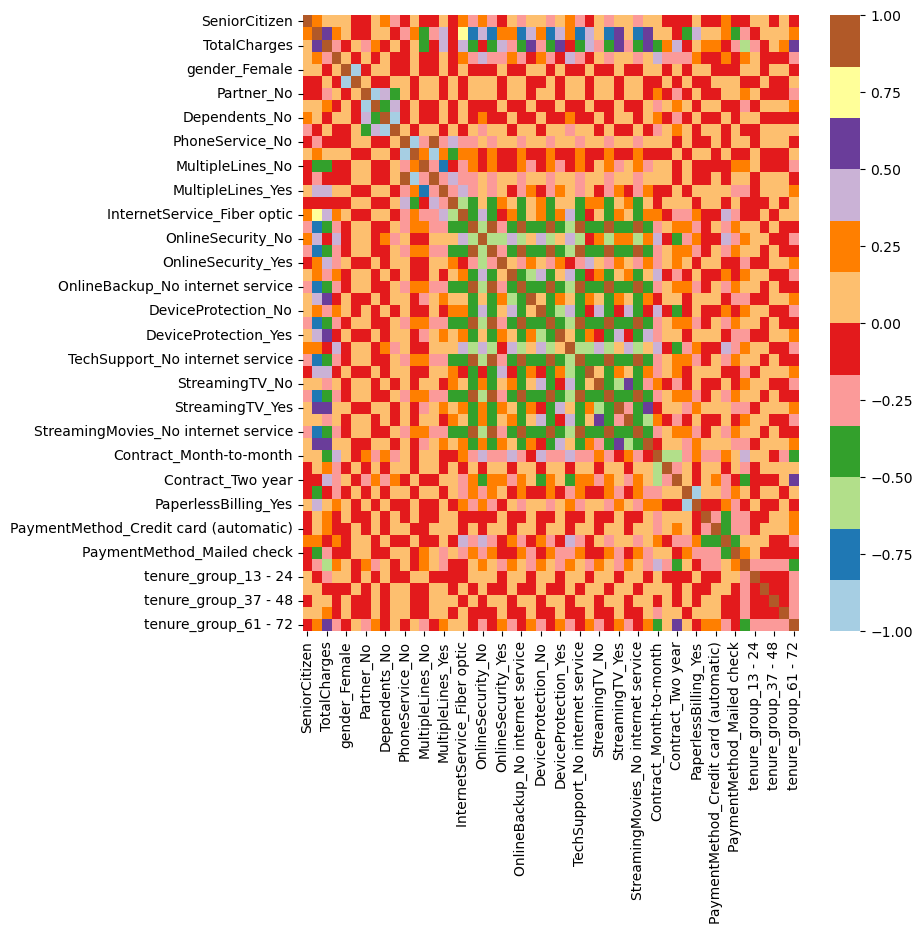

In [220]:
plt.figure(figsize=(5,5))
sns.heatmap(new_df_dummies.corr(), cmap='Paired')

In [222]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\HP\AppData\Local\Temp\ipykernel_8936\416614003.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Ten = sns.kdeplot(df.tenure[(df['Churn']=='Yes')],


Text(0.5, 1.0, 'Tenure by Churn')

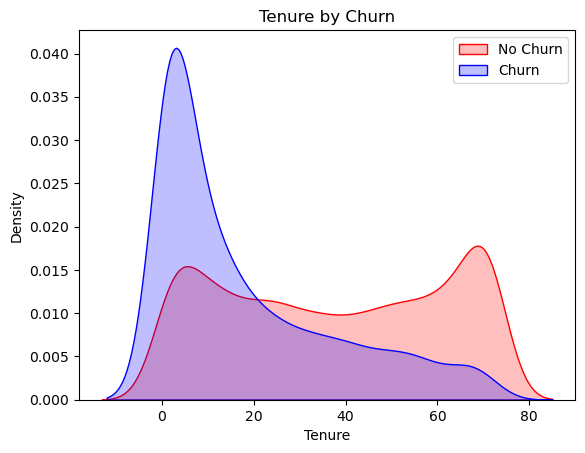

In [226]:
Ten = sns.kdeplot(df.tenure[(df['Churn']=='No')],
                  color='Red',fill=True)
Ten = sns.kdeplot(df.tenure[(df['Churn']=='Yes')],
                  ax=Ten,color='Blue',shade=True)
Ten.legend(["No Churn","Churn"],loc='upper right')
Ten.set_ylabel('Density')
Ten.set_xlabel('Tenure')
Ten.set_title('Tenure by Churn')

##### People with less tenure are high Churners

## Bivariate Analysis

In [306]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [310]:
len(new_df1_target1)

1869

In [312]:
len(new_df1_target0)

5163

In [322]:
def uniplot(df, col, title, hue=None, yscale='linear'):
    """
    Creates a countplot with customization for better visualization.
    
    Parameters:
    - df: DataFrame
    - col: str, column name for x-axis
    - title: str, title of the plot
    - hue: str, optional, column name for grouping by hue
    - yscale: str, 'linear' or 'log', y-axis scale
    
    Returns:
    - Displays the plot
    """
    # Ensure the column exists
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")
    if hue and hue not in df.columns:
        raise ValueError(f"Hue '{hue}' not found in DataFrame.")
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    # Configure plot dimensions
    unique_col_values = df[col].nunique()
    unique_hue_values = df[hue].nunique() if hue else 0
    width = max(10, unique_col_values + 5 + 4 * unique_hue_values)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(width, 8))
    plt.title(title, fontsize=22, pad=20)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    
    sns.countplot(
        data=df,
        x=col,
        hue=hue,
        order=df[col].value_counts().index,
        palette='bright',
        ax=ax
    )
    
    # Set y-scale
    if yscale not in ['linear', 'log']:
        raise ValueError("yscale must be 'linear' or 'log'.")
    plt.yscale(yscale)
    
    # Add labels
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    
    plt.tight_layout()
    plt.show()

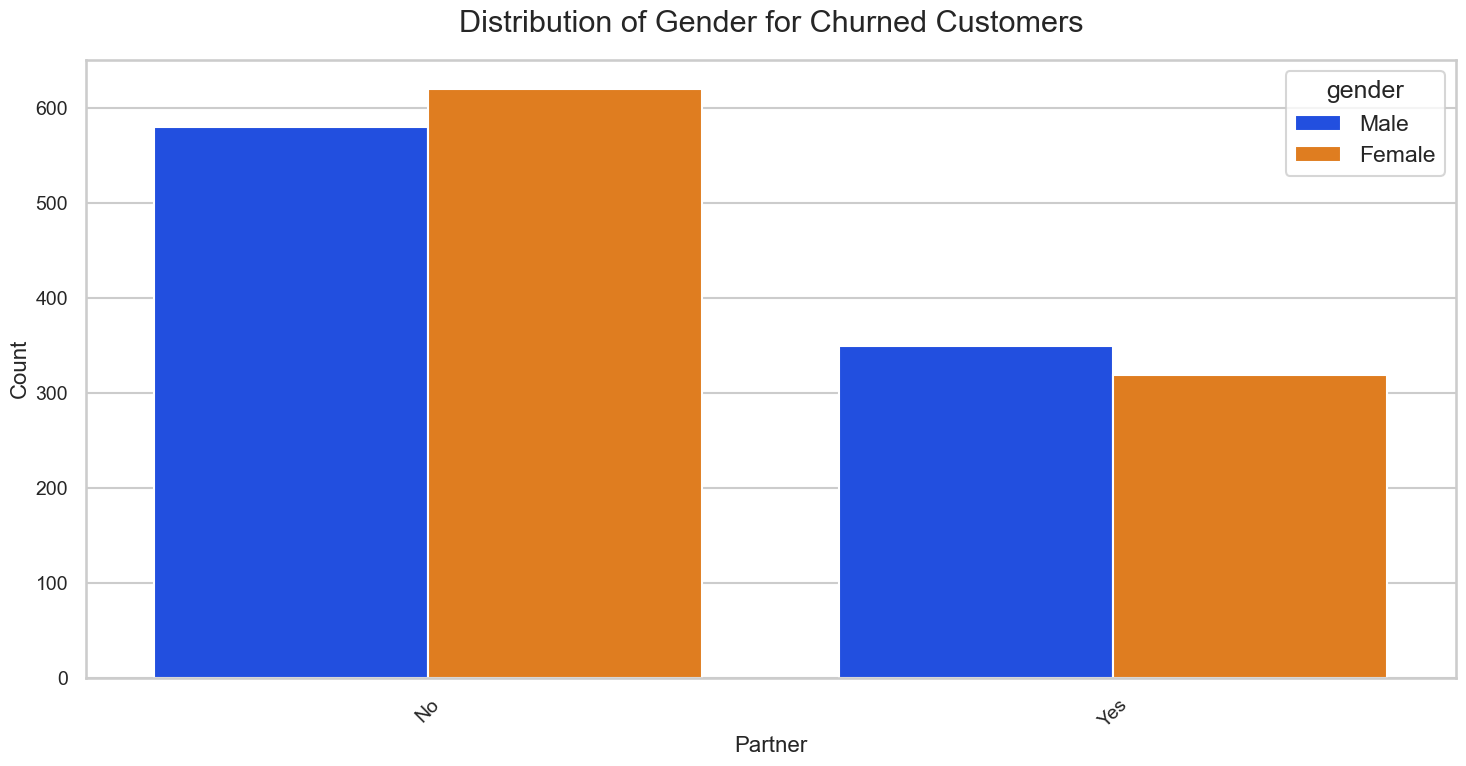

In [324]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

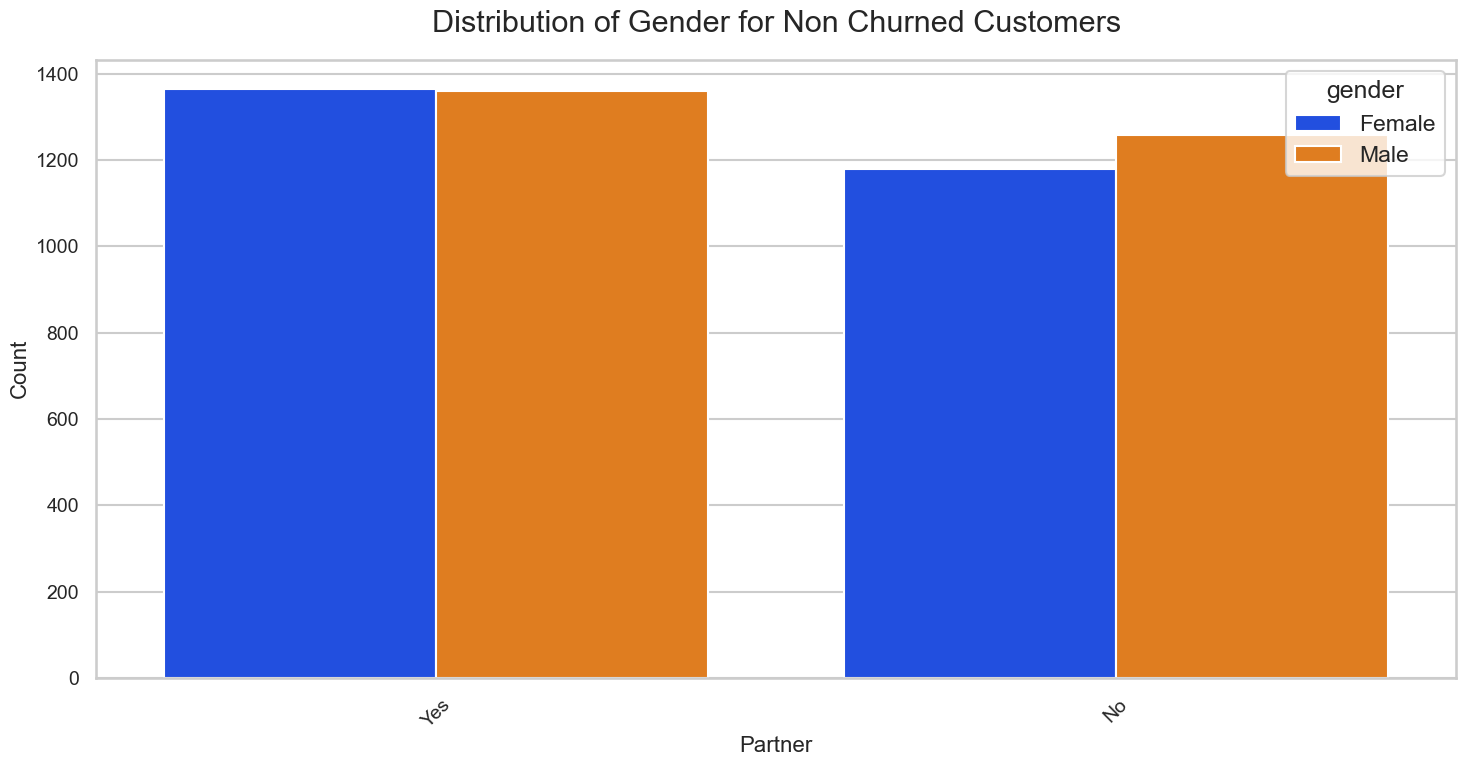

In [326]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

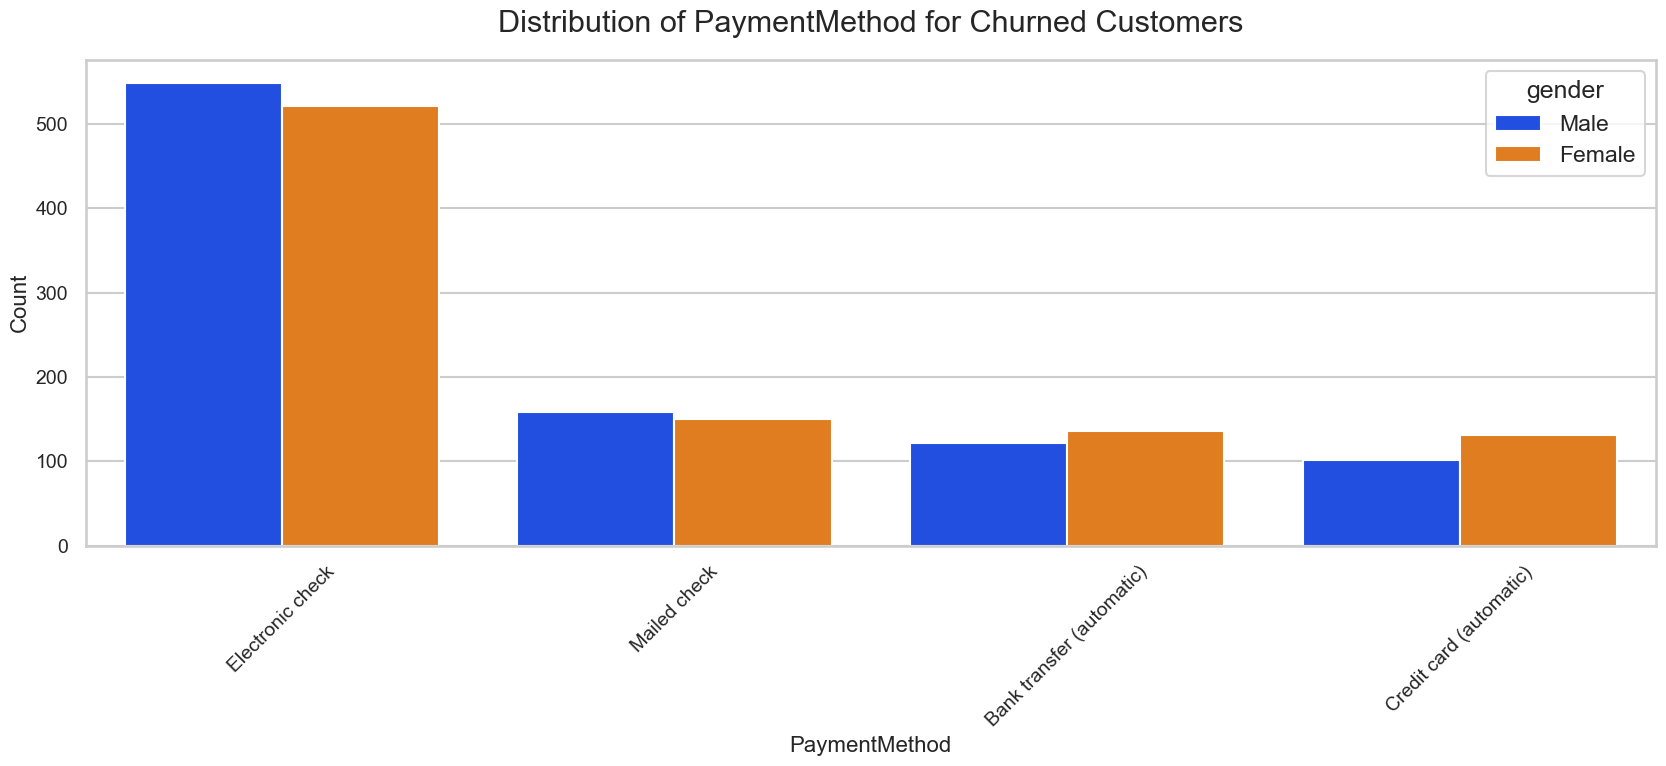

In [328]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

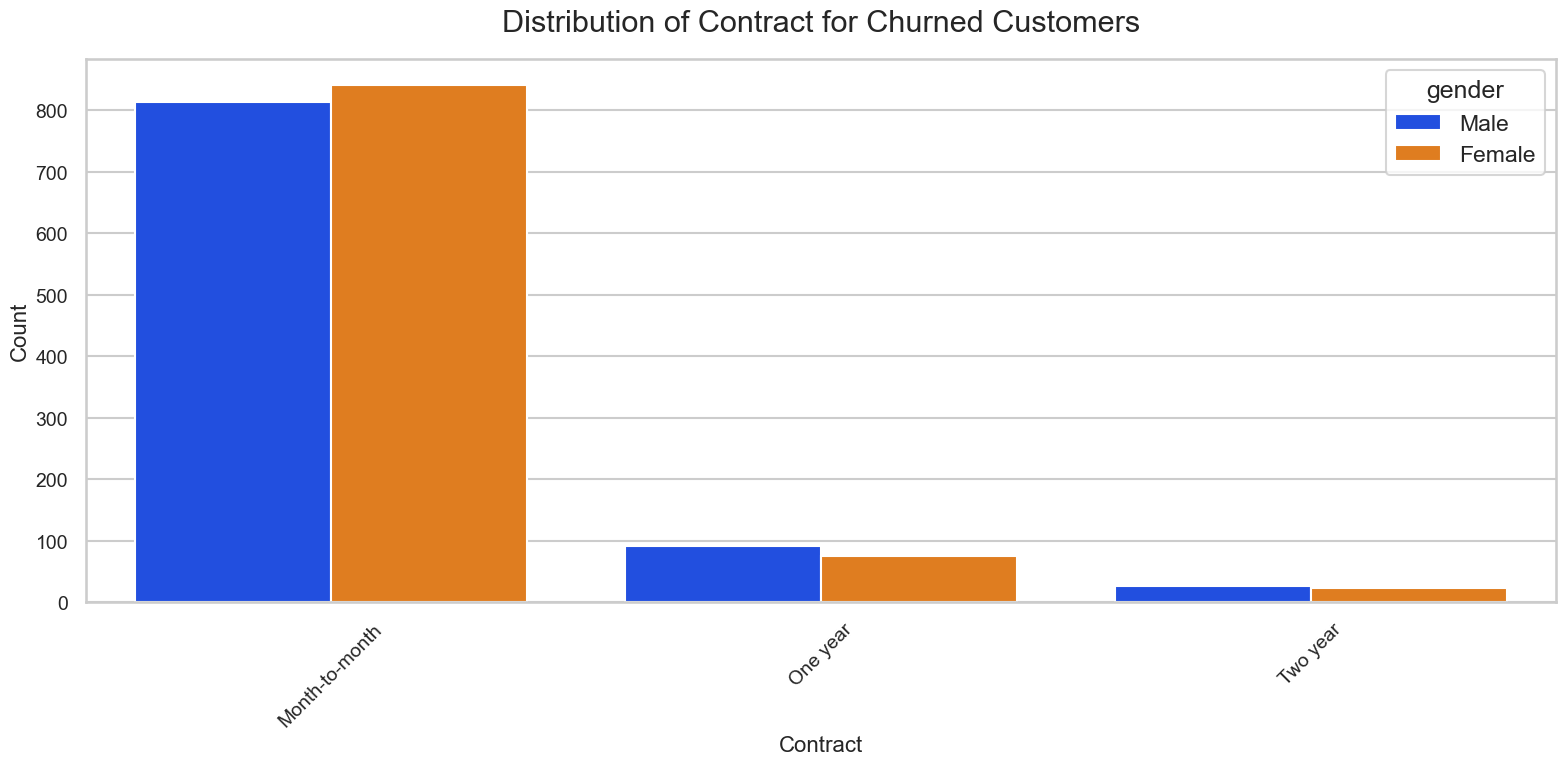

In [330]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

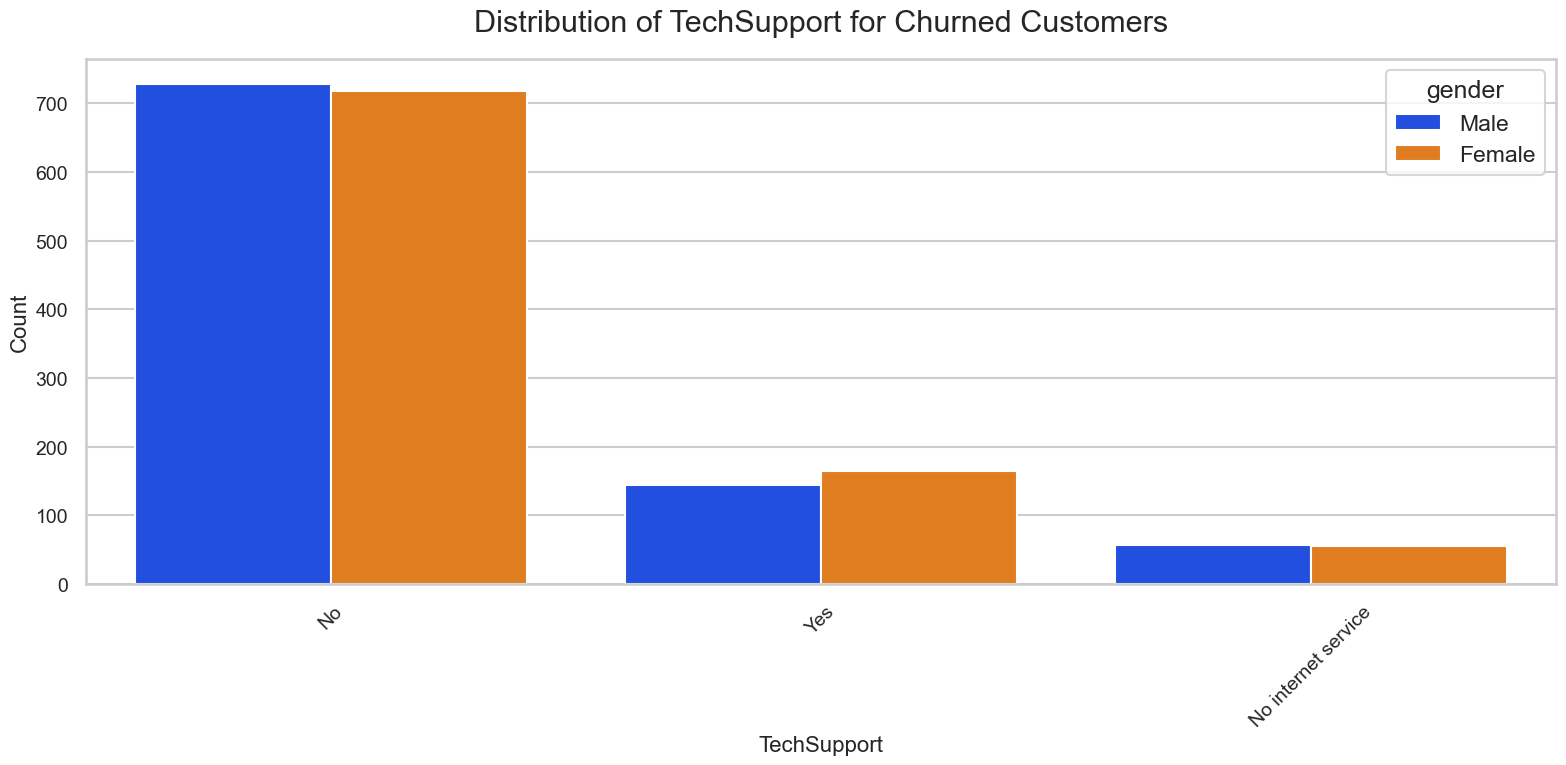

In [332]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

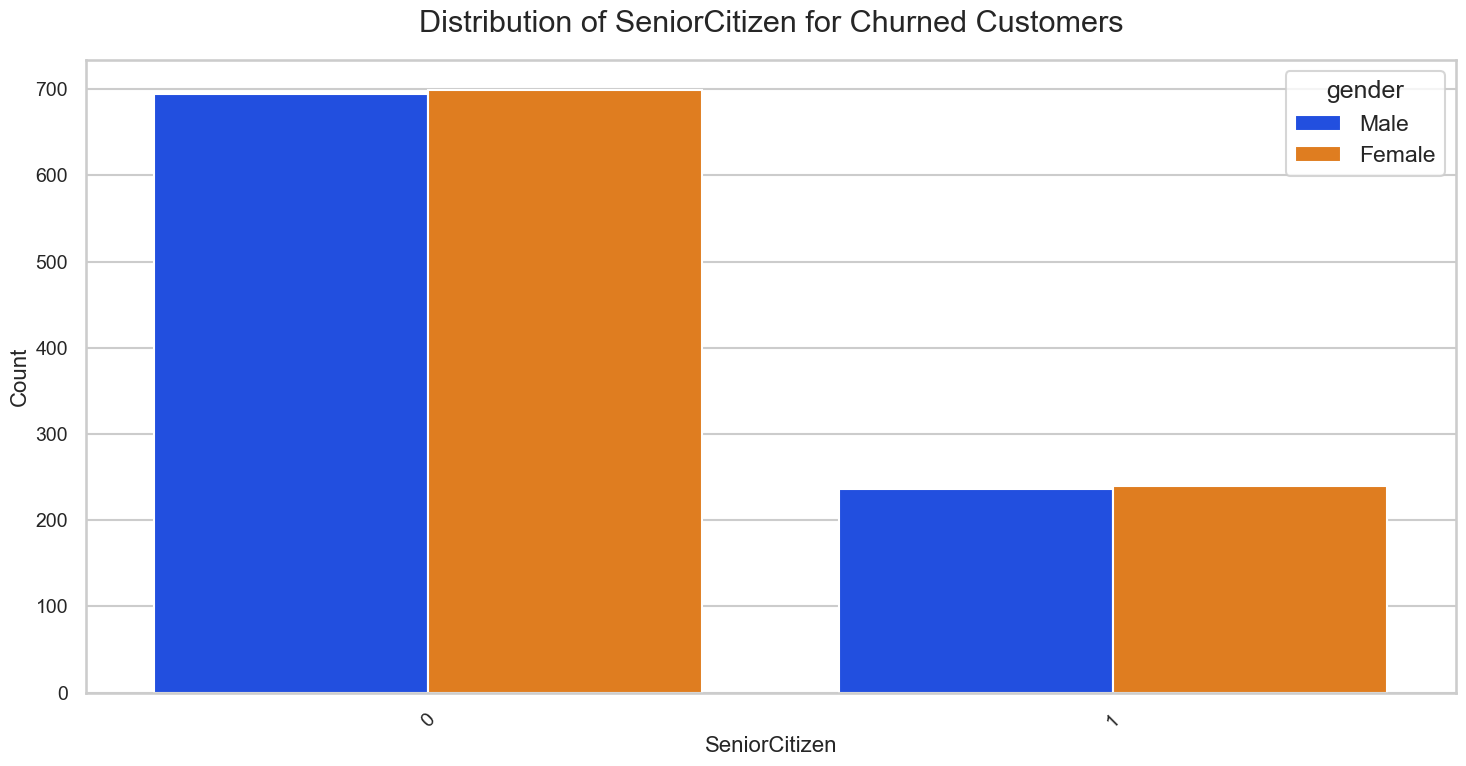

In [334]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')